# Final Project - Clustering

## 1- Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

- Group 04 : 
    - Gusti Ayu Dewi Puspa Kartikasari
    - Malvin Subahri
    - Muhammad Irham Dinan
- Batch : 
    - FTDS-012
- Dataset : 
    - given dataset regarding hobbies.
- Objectives : 
    - to make clustering model which able to predict customer segmentation based on their hobbies, where this clustering model result will be mapped to best possible healing recommendation system for them.

## 2- Import Library

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
!pip install kmodes

In [2]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from kmodes.kmodes import KModes

## 3- Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Load dataset .csv ke into 'data'

path = 'hobbies.csv'
data = pd.read_csv(path)

In [4]:
# Preview datatrain using head()

data.head()

,Unnamed: 0,Reading,Music,Cinema,Show,Exhibition,Computer,Sport,Walking,Travelling,...,Gardening,Knitting,Cooking,Fishing,TV,Sex,Age,Marital status,Profession,nb.activitees
0,11000210,1,1,1,1,1,0,1,1,1,...,0,0,0,0,2,F,"(55,65]",Married,Management,11
1,11000410,1,0,0,0,1,0,1,1,0,...,1,0,0,0,4,M,"(45,55]",Married,NaN,9
2,11000610,1,1,0,0,1,0,0,0,1,...,0,0,0,0,4,F,"(25,35]",Remarried,Management,5
3,11000710,1,0,0,0,1,0,1,0,1,...,0,0,0,0,1,M,"(75,85]",Married,NaN,5
4,11000810,1,1,1,1,0,0,0,1,0,...,0,0,0,0,3,M,"(55,65]",Married,Employee,6


In [5]:
# Preview datatrain using tail()

data.tail()

,Unnamed: 0,Reading,Music,Cinema,Show,Exhibition,Computer,Sport,Walking,Travelling,...,Gardening,Knitting,Cooking,Fishing,TV,Sex,Age,Marital status,Profession,nb.activitees
8398,93128910,1,1,0,0,0,0,0,0,0,...,0,1,1,0,4,F,"(65,75]",Widower,Unskilled worker,5
8399,93129110,1,1,0,0,0,0,0,0,1,...,1,1,1,0,4,F,"(45,55]",Married,Unskilled worker,7
8400,93129210,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,M,"(35,45]",Married,NaN,14
8401,93129310,0,0,0,0,0,0,0,1,1,...,1,0,0,0,3,F,"(55,65]",Married,Employee,4
8402,93129410,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,M,"(35,45]",Divorcee,Manual labourer,4


In [6]:
# Duplicate dataset data into data_original

data_original = data.copy()

#### Overview Dataset

In [7]:
# Check common information of dataset using info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8403 entries, 0 to 8402
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      8403 non-null   int64 
 1   Reading         8403 non-null   int64 
 2   Music           8403 non-null   int64 
 3   Cinema          8403 non-null   int64 
 4   Show            8403 non-null   int64 
 5   Exhibition      8403 non-null   int64 
 6   Computer        8403 non-null   int64 
 7   Sport           8403 non-null   int64 
 8   Walking         8403 non-null   int64 
 9   Travelling      8403 non-null   int64 
 10  Collecting      8403 non-null   int64 
 11  Volunteering    8403 non-null   int64 
 12  Mechanic        8403 non-null   int64 
 13  Gardening       8403 non-null   int64 
 14  Knitting        8403 non-null   int64 
 15  Cooking         8403 non-null   int64 
 16  Fishing         8403 non-null   int64 
 17  TV              8403 non-null   int64 
 18  Sex     

Based on datatrain overview's result above, data is consisted of 8403 rows, however there is column which contains null value (missing value) 1498 rows in `Profession` column.

In [8]:
# Check data's descriptive statistics using describe()

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8403.0,5.067652e+07,2.713636e+07,11000210.0,24048010.0,43024610.0,82007560.0,93129410.0
Reading,8403.0,6.719029e-01,4.695483e-01,0.0,0.0,1.0,1.0,1.0
Music,8403.0,7.243841e-01,4.468507e-01,0.0,0.0,1.0,1.0,1.0
Cinema,8403.0,3.997382e-01,4.898736e-01,0.0,0.0,0.0,1.0,1.0
Show,8403.0,2.885874e-01,4.531326e-01,0.0,0.0,0.0,1.0,1.0
Exhibition,8403.0,3.088183e-01,4.620335e-01,0.0,0.0,0.0,1.0,1.0
Computer,8403.0,3.758182e-01,4.843623e-01,0.0,0.0,0.0,1.0,1.0
Sport,8403.0,3.683208e-01,4.823777e-01,0.0,0.0,0.0,1.0,1.0
Walking,8403.0,4.968464e-01,5.000198e-01,0.0,0.0,0.0,1.0,1.0
Travelling,8403.0,4.002142e-01,4.899708e-01,0.0,0.0,0.0,1.0,1.0


#### Dropping Unrelated Information to Analysis from Dataset

In [9]:
# drop unrelated information: ID & unfamiliar hobbies category: ID

drop_column = ['Unnamed: 0', 'Show', 'Collecting', 'Volunteering', 'Mechanic', 'Knitting', 'TV', 'nb.activitees']
data.drop(drop_column, axis=1, inplace=True)

In [10]:
# rename columns becoming without space

data = data.rename(columns={"Marital status": "MaritalStatus"})

In [11]:
data.columns

Index(['Reading', 'Music', 'Cinema', 'Exhibition', 'Computer', 'Sport',
       'Walking', 'Travelling', 'Gardening', 'Cooking', 'Fishing', 'Sex',
       'Age', 'MaritalStatus', 'Profession'],
      dtype='object')

## 4- Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

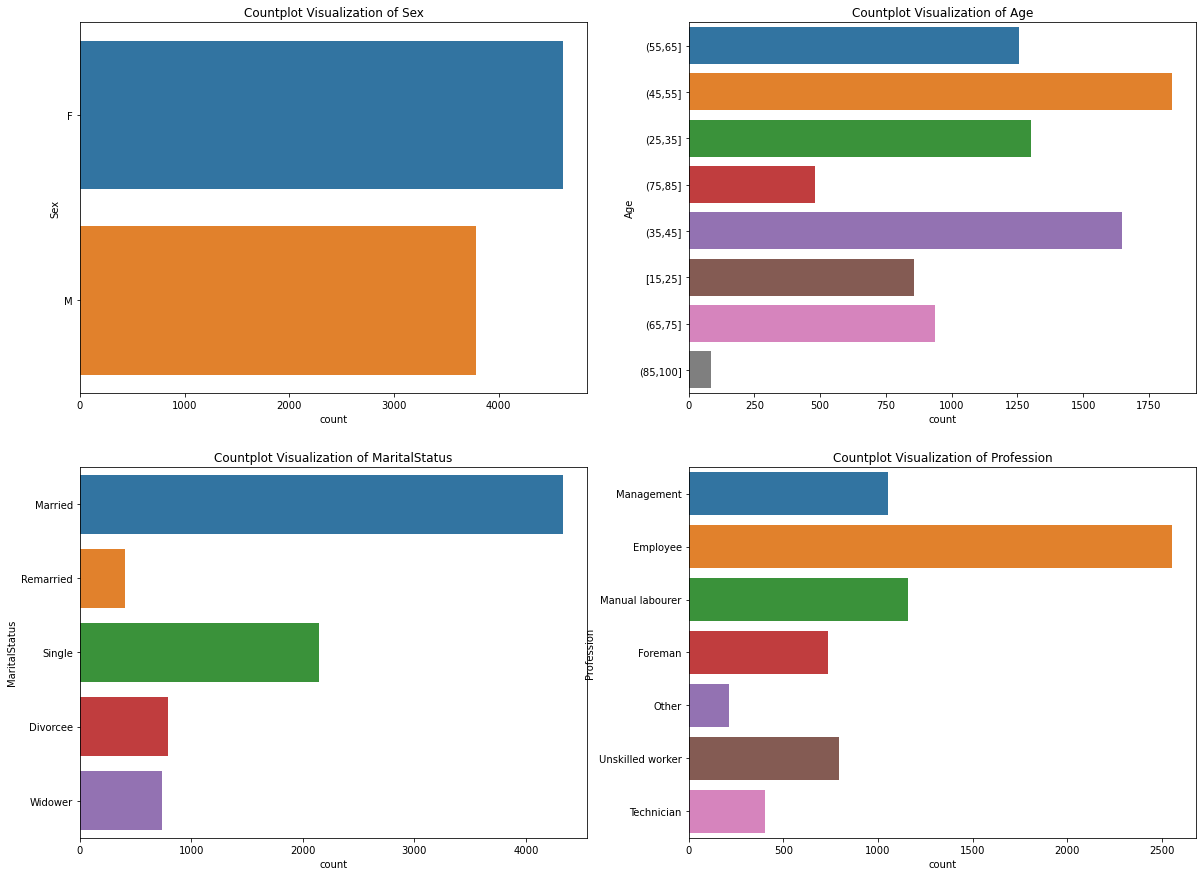

In [13]:
# Create visualization of distribution of 

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.countplot(y='Sex', data=data)
plt.title('Countplot Visualization of Sex')

plt.subplot(2, 2, 2)
sns.countplot(y='Age', data=data)
plt.title('Countplot Visualization of Age')

plt.subplot(2, 2, 3)
sns.countplot(y='MaritalStatus', data=data)
plt.title('Countplot Visualization of MaritalStatus')

plt.subplot(2, 2, 4)
sns.countplot(y='Profession', data=data)
plt.title('Countplot Visualization of Profession')

plt.show()

Based on  visualization above, it can be seen that in `Sex`, `Age`, `MaritalStatus`, and `Profession` columns indicate particular information as follows: 
- dataset is obtained from group people who is nearly equal between Male & Female.
- dataset is obtained from mostly middle-age adult category age around 35-55 years old.
- dataset is obtained from mostly married group people and a half of single group people.
- dataset is obtained from group people whose profession as employee.

## 5- Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Get Data for Model Inference

In [14]:
# Create data_inf variable for model inference from data by 15 samples 

data_inf = data.sample(15, random_state=25)
data_inf

,Reading,Music,Cinema,Exhibition,Computer,Sport,Walking,Travelling,Gardening,Cooking,Fishing,Sex,Age,MaritalStatus,Profession
7099,1,1,1,0,1,1,1,1,0,0,0,M,"[15,25]",Single,NaN
6080,1,1,0,0,1,0,0,0,1,0,1,M,"(45,55]",Married,Employee
6891,0,1,0,0,0,0,1,0,1,1,0,F,"(65,75]",Widower,NaN
6230,0,1,0,0,0,0,0,0,0,0,0,F,"(25,35]",Married,NaN
1579,1,1,1,1,1,1,0,1,0,0,0,F,"(25,35]",Married,Employee
1263,1,0,0,0,0,0,1,1,0,1,0,F,"(55,65]",Married,Unskilled worker
4663,1,0,0,0,0,0,1,0,0,0,0,F,"(75,85]",Remarried,Employee
741,1,1,0,1,0,0,1,1,0,0,0,M,"(55,65]",Remarried,Employee
7068,1,0,1,1,0,0,0,1,0,1,0,F,"(75,85]",Widower,Employee
8324,0,0,0,0,0,0,0,0,0,0,0,M,"(65,75]",Divorcee,Manual labourer


In [15]:
data_inf.isnull().sum()

Reading          0
Music            0
Cinema           0
Exhibition       0
Computer         0
Sport            0
Walking          0
Travelling       0
Gardening        0
Cooking          0
Fishing          0
Sex              0
Age              0
MaritalStatus    0
Profession       4
dtype: int64

In [16]:
# Drop missing value in data_inf and rearrange index of Inference Set (to minimalise possibility of error due to indexing)

data_inf = data_inf.dropna()
data_inf.reset_index(drop=True, inplace=True)

### Splitting Dataset

In [17]:
# Seperate Inference Set from Data 

data_cluster = data.drop(data_inf.index)
data_cluster

,Reading,Music,Cinema,Exhibition,Computer,Sport,Walking,Travelling,Gardening,Cooking,Fishing,Sex,Age,MaritalStatus,Profession
11,1,1,1,1,0,0,1,1,0,0,0,F,"(75,85]",Divorcee,Management
12,1,1,1,1,1,1,0,1,0,0,0,F,"(35,45]",Married,Employee
13,1,1,1,1,1,1,1,1,0,1,0,F,"[15,25]",Single,NaN
14,0,1,0,0,0,0,0,0,1,0,0,F,"(65,75]",Divorcee,NaN
15,1,0,1,0,0,0,0,0,0,0,0,F,"(45,55]",Married,Employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,1,1,0,0,0,0,0,0,0,1,0,F,"(65,75]",Widower,Unskilled worker
8399,1,1,0,0,0,0,0,1,1,1,0,F,"(45,55]",Married,Unskilled worker
8400,1,1,1,1,1,1,1,1,1,0,0,M,"(35,45]",Married,NaN
8401,0,0,0,0,0,0,1,1,1,0,0,F,"(55,65]",Married,Employee


In [18]:
# Rearrange index of Inference Set & Train Set (to minimalise possibility of error due to indexing)

data_cluster.reset_index(drop=True, inplace=True)


In [20]:
# Assign variable X for clustering by using data_cluster 

X = data_cluster

### Handling Missing Values

In [21]:
# Memeriksa jumlah isnull pada variabel

X.isnull().sum()

Reading             0
Music               0
Cinema              0
Exhibition          0
Computer            0
Sport               0
Walking             0
Travelling          0
Gardening           0
Cooking             0
Fishing             0
Sex                 0
Age                 0
MaritalStatus       0
Profession       1495
dtype: int64

In [22]:
#Check percentage of missing value

missing_value = X[(X['Profession'].isnull() == True)].index.tolist()
print('Percentage missing value in Profession Column : {:.2f}%'.format(len(missing_value)/len(data_cluster) * 100))

Percentage missing value in Profession Column : 17.81%


Since missingness in Profession is completely at random and its proportion is quite big (>10%), hence handling missing value that will be performed is by using random value imputation method to keep total rows as it is.

In [23]:
# Function to Filling Missing Values with Zeroes and Median

def impute_na(df, variable, randomstate):
      
    # Extract the random sample to fill the NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=randomstate)
    
    # Pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    
    # Merge into one dataframe
    df.loc[df[variable].isnull(), variable] = random_sample
    
    return df

In [24]:
# Perform imputation on Missing Values in columns 'Profession'

X = impute_na(X, 'Profession', 25)

In [25]:
# Recheck again after imputation

X.isnull().sum()

Reading          0
Music            0
Cinema           0
Exhibition       0
Computer         0
Sport            0
Walking          0
Travelling       0
Gardening        0
Cooking          0
Fishing          0
Sex              0
Age              0
MaritalStatus    0
Profession       0
dtype: int64

### Handling Outliers

Since dataset is all categorical data, therefore handling outliers is not performed.

## 6- Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In this case, the *objective* is an *unsupervised learning* which is able to make clustering from dataset of group of people hobbies by using clustering algorithm model for categorical data: 
- **K-Modes**

Based on K-Modes' documentation, K-Modes is used for clustering categorical variables. It defines clusters based on the number of matching categories between data points. (This is in contrast to the more well-known k-means algorithm, which clusters numerical data based on Euclidean distance.)

## 7- Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

#### Find n-Cluster based on Elbow Method

In [26]:
# Iterate number of cluster against cost output by using initial centroid of Huang

kmodes_per_k = [KModes(n_clusters=k, init = "Huang", n_init = 5, random_state=25).fit(X)
                for k in range(1, 11)]
cost = [model.cost_ for model in kmodes_per_k]

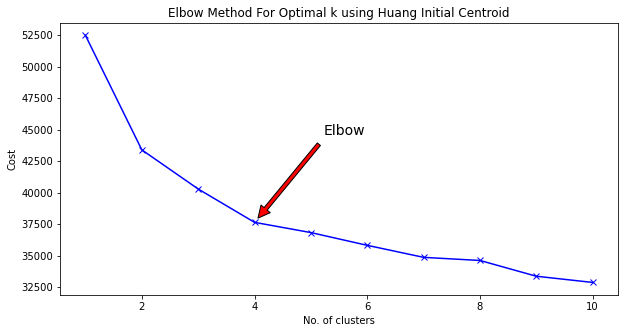

In [33]:
# Plot visualization of KModes  

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k using Huang Initial Centroid')
plt.annotate('Elbow',
             xy=(4, cost[3]),
             xytext=(0.45, 0.55),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='red', shrink=0.05)
            )
plt.show()

Cost is the sum of all the dissimilarities between the clusters.

In [34]:
# Check cost value for K=4

cost[3]

37646.0

In [35]:
# Check n_iter value for K=4

n_iter = [model.n_iter_ for model in kmodes_per_k]
n_iter[3]

3

According to the scree plot, it can be seen that a bend at K=4 in the above graph indicating 4 is the optimal number of clusters. It means we will have four groups of customers based on customer characteristics.

The k-Modes clustering algorithm with k=4 needs 3 iterations to converge with the total cost of 37,646. After the algorithm is done, we get the cluster centroids where the calculation is based on the modes. 

In [36]:
# Building the model with 4 clusters

kmodes_4 = KModes(n_clusters=4, init = "Huang", n_init = 5, random_state=25, verbose=1)
clusters = kmodes_4.fit(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2903, cost: 42644.0
Run 1, iteration: 2/100, moves: 2278, cost: 39186.0
Run 1, iteration: 3/100, moves: 1925, cost: 38522.0
Run 1, iteration: 4/100, moves: 222, cost: 38522.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3056, cost: 40155.0
Run 2, iteration: 2/100, moves: 1709, cost: 38963.0
Run 2, iteration: 3/100, moves: 459, cost: 38963.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3017, cost: 38641.0
Run 3, iteration: 2/100, moves: 1520, cost: 37646.0
Run 3, iteration: 3/100, moves: 48, cost: 37646.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2839, cost: 39836.0
Run 4, iteration: 2/100, moves: 865, cost: 39324.0
Run 4, iteration: 3/100, moves: 963, cost: 38301.0
Run 4, ite

In [38]:
# Cluster centorid (the top leader based on most frequency for each class)

kmodes_4.cluster_centroids_

array([['1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', 'F',
        '(45,55]', 'Married', 'Employee'],
       ['1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', 'F',
        '[15,25]', 'Single', 'Employee'],
       ['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'M',
        '(45,55]', 'Married', 'Employee'],
       ['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', 'F',
        '(35,45]', 'Married', 'Employee']], dtype='<U11')

Basically, cluster_centroids_ is represented final iteration result of top leader of each categories by calculating the dissimilarities between the observations and the newly obtained leaders.

In [39]:
# Check the iteration of the clusters created

kmodes_4.n_iter_

3

n_iter_ is represented how many number of iteratation to converge into cost of dissimilarities in clustering this dataset

In [40]:
# Check the cost of the clusters created

kmodes_4.cost_

37646.0

40,220 is cost of dissimilarities in clustering this dataset into 3 clusters.

In [41]:
# Check the output labels of the clusters created

kmodes_4.labels_

array([3, 3, 3, ..., 3, 0, 2], dtype=uint16)

In [42]:
kmodes_4.predict(X)

array([3, 3, 3, ..., 3, 0, 2], dtype=uint16)

kmodes_4.labels_ give output labels of the clusters created

#### Save clustering result

In [44]:
# Save clustering result by using kmode_3.labels_

kmodes_4labels_df = pd.DataFrame(kmodes_4.labels_, columns=['labels'])
kmodes_4labels_df

,labels
0,3
1,3
2,3
3,2
4,1
...,...
8387,0
8388,0
8389,3
8390,0


In [45]:
# Merge clustering result into existing X dataframe

X['labels'] = kmodes_4labels_df
X

,Reading,Music,Cinema,Exhibition,Computer,Sport,Walking,Travelling,Gardening,Cooking,Fishing,Sex,Age,MaritalStatus,Profession,labels
0,1,1,1,1,0,0,1,1,0,0,0,F,"(75,85]",Divorcee,Management,3
1,1,1,1,1,1,1,0,1,0,0,0,F,"(35,45]",Married,Employee,3
2,1,1,1,1,1,1,1,1,0,1,0,F,"[15,25]",Single,Employee,3
3,0,1,0,0,0,0,0,0,1,0,0,F,"(65,75]",Divorcee,Unskilled worker,2
4,1,0,1,0,0,0,0,0,0,0,0,F,"(45,55]",Married,Employee,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,1,1,0,0,0,0,0,0,0,1,0,F,"(65,75]",Widower,Unskilled worker,0
8388,1,1,0,0,0,0,0,1,1,1,0,F,"(45,55]",Married,Unskilled worker,0
8389,1,1,1,1,1,1,1,1,1,0,0,M,"(35,45]",Married,Manual labourer,3
8390,0,0,0,0,0,0,1,1,1,0,0,F,"(55,65]",Married,Employee,0


In [46]:
# Preview X by using sample()

X.sample(15)

,Reading,Music,Cinema,Exhibition,Computer,Sport,Walking,Travelling,Gardening,Cooking,Fishing,Sex,Age,MaritalStatus,Profession,labels
7061,0,1,1,0,1,1,0,0,0,1,0,F,"[15,25]",Single,Technician,1
4429,1,1,1,0,1,1,1,1,0,1,0,F,"(25,35]",Married,Employee,3
5421,1,1,1,0,1,0,0,0,0,1,0,F,"(25,35]",Married,Employee,0
1534,0,1,1,0,1,1,1,0,0,1,0,M,"(35,45]",Single,Employee,3
5365,1,1,1,0,1,1,1,0,1,1,0,M,"[15,25]",Single,Technician,1
4331,0,1,1,0,0,0,0,0,0,0,0,M,"(25,35]",Married,Unskilled worker,2
5640,1,1,0,0,0,0,0,1,0,0,0,M,"(55,65]",Widower,Foreman,2
6064,1,1,0,1,1,0,1,1,0,0,0,F,"(45,55]",Married,Employee,3
6176,1,1,1,1,1,0,1,1,1,1,1,M,"(55,65]",Married,Management,3
8198,0,1,0,0,0,0,0,0,0,0,0,M,"(25,35]",Married,Employee,2


### Exolatory Data Analysis after Clustering

<AxesSubplot:xlabel='labels', ylabel='count'>

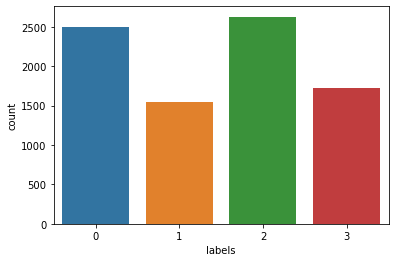

In [47]:
# Create visualization of distribution of 'labels'

sns.countplot(x=X['labels'])

In [48]:
X.labels.value_counts()

2    2628
0    2496
3    1724
1    1544
Name: labels, dtype: int64

Based on visualization above, it can be seen that all labels are nearly equal, between 1500 to 2500 total numbers.

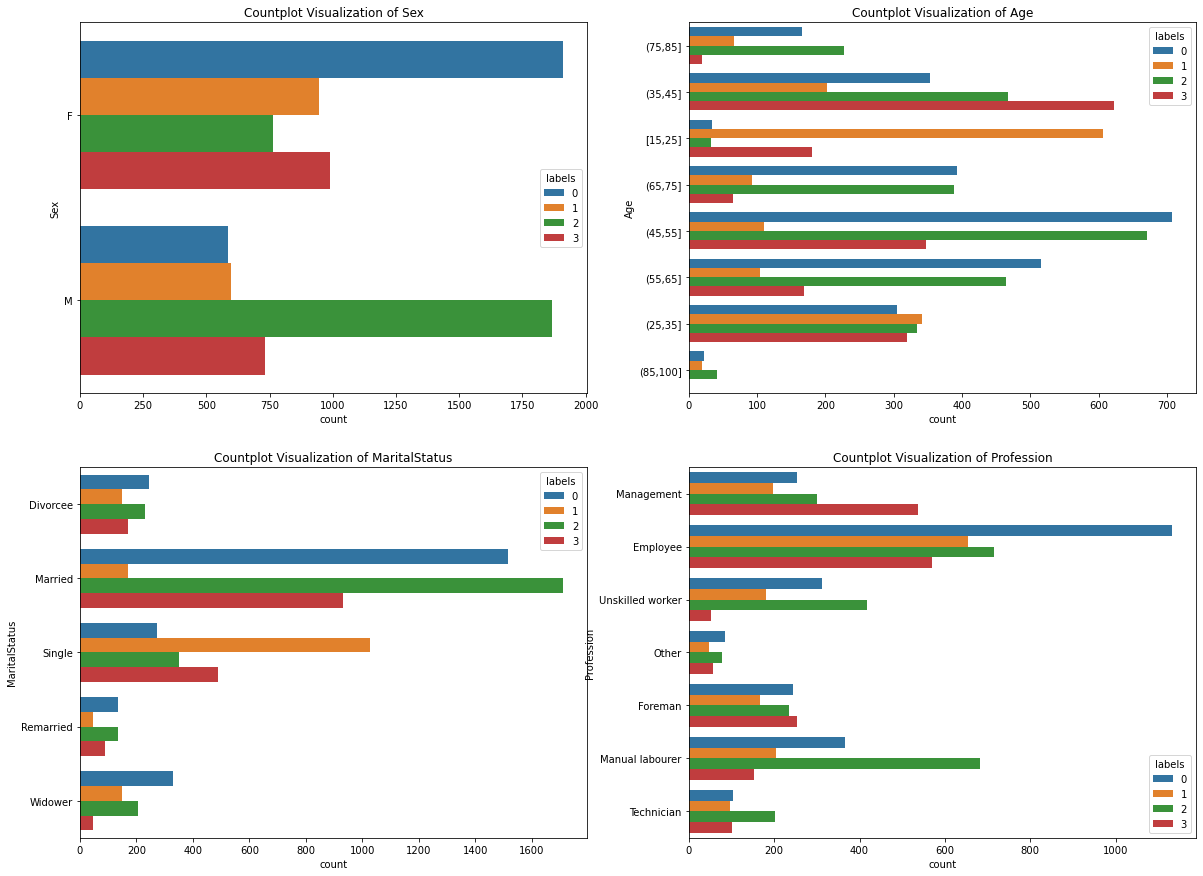

In [49]:
# Create visualization of distribution of 

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.countplot(y='Sex', hue='labels',  data=X)
plt.title('Countplot Visualization of Sex')

plt.subplot(2, 2, 2)
sns.countplot(y='Age', hue='labels',  data=X)
plt.title('Countplot Visualization of Age')

plt.subplot(2, 2, 3)
sns.countplot(y='MaritalStatus', hue='labels',  data=X)
plt.title('Countplot Visualization of MaritalStatus')

plt.subplot(2, 2, 4)
sns.countplot(y='Profession', hue='labels',  data=X)
plt.title('Countplot Visualization of Profession')

plt.show()

In [129]:
X.columns

Index(['Reading', 'Music', 'Cinema', 'Exhibition', 'Computer', 'Sport',
       'Walking', 'Travelling', 'Gardening', 'Cooking', 'Fishing', 'Sex',
       'Age', 'MaritalStatus', 'Profession', 'labels'],
      dtype='object')

In [50]:
# Grouping and aggregating to see cumulative each hobbies based on labels

X.groupby(by=['labels'])[['Reading', 'Music', 'Cinema', 'Exhibition', 'Computer',
                                  'Sport', 'Walking', 'Travelling', 'Gardening', 'Cooking','Fishing']
                                ].sum().sort_values(by='labels').T

labels,0,1,2,3
Reading,2077,1166,796,1598
Music,1797,1302,1376,1605
Cinema,497,1104,291,1461
Exhibition,604,311,317,1357
Computer,503,717,503,1432
Sport,496,946,359,1288
Walking,1788,379,625,1379
Travelling,805,462,579,1512
Gardening,1708,179,675,792
Cooking,1703,365,434,1184


### Customer Segmentation Results

Based on evaluation of Exploratory Data Analysis after clustering, we can simplify a group of people as follows:
 - labels = 0, group of people who is likely mature to ederly adult around 45-75 years old, with more females & married people, and their particular profession is common job as employee. Besides love reading & music, their hobbies tend to like walking, gardening, and cooking.
 -  labels = 1, group of people who is likely adolescent to young adult around 15-25 years old, with more single people, and their particular profession is distributed well. Besides love reading & music, their hobbies tend to like going to cinema, excercising sport, and playing computer.
 - labels = 2, group of people who is likely mature to ederly adult around 45-75 years old, with more males & married people, and their particular profession is more physical job as manual labourer. Besides love reading & music, their hobbies tend to like gardening, walking, and traveling.
 - labels = 3, group of people who is likely productive adult around 35-45 years old, with distributed well in gender and marital status, and their particular profession is likely in managerial job. Besides love reading & music, their hobbies tend to like travelling, going to cinema, and playing computer.

## 9- Model Saving

In [52]:
# Save model pickle into 'kmodes_4'

import joblib
import json

with open('kmodes_4.pkl', 'wb') as file_1:
  joblib.dump(kmodes_4, file_1)

## 10- Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### Model Loading

In [53]:
# Load model pickle 'kmodes_4'

with open('kmodes_4.pkl', 'rb') as file_1:
  kmodes_4 = joblib.load(file_1)

### Inferencing

In [55]:
# Preview data_inf

data_inf

,Reading,Music,Cinema,Exhibition,Computer,Sport,Walking,Travelling,Gardening,Cooking,Fishing,Sex,Age,MaritalStatus,Profession
0,1,1,0,0,1,0,0,0,1,0,1,M,"(45,55]",Married,Employee
1,1,1,1,1,1,1,0,1,0,0,0,F,"(25,35]",Married,Employee
2,1,0,0,0,0,0,1,1,0,1,0,F,"(55,65]",Married,Unskilled worker
3,1,0,0,0,0,0,1,0,0,0,0,F,"(75,85]",Remarried,Employee
4,1,1,0,1,0,0,1,1,0,0,0,M,"(55,65]",Remarried,Employee
5,1,0,1,1,0,0,0,1,0,1,0,F,"(75,85]",Widower,Employee
6,0,0,0,0,0,0,0,0,0,0,0,M,"(65,75]",Divorcee,Manual labourer
7,1,1,0,1,0,0,1,1,1,1,0,M,"(65,75]",Remarried,Manual labourer
8,0,0,0,0,0,0,0,0,0,0,0,M,"(65,75]",Widower,Unskilled worker
9,1,1,1,1,1,1,1,0,1,1,1,F,"(25,35]",Married,Management


In [56]:
# Predict clustering using trained model K-Modes 

labels_inf = kmodes_4.predict(data_inf)
labels_inf

array([2, 3, 0, 0, 2, 3, 2, 0, 2, 3, 0], dtype=uint16)

In [57]:
# Convert array of labels_inf into dataframe

labels_inf_df = pd.DataFrame(labels_inf, columns=['labels'])
labels_inf_df

,labels
0,2
1,3
2,0
3,0
4,2
5,3
6,2
7,0
8,2
9,3


In [58]:
# Concatenate dataframe of clustering result of data_inf named as labes_inf_df to data_inf

data_inf_show  = pd.concat([data_inf, labels_inf_df], axis=1)
data_inf_show

,Reading,Music,Cinema,Exhibition,Computer,Sport,Walking,Travelling,Gardening,Cooking,Fishing,Sex,Age,MaritalStatus,Profession,labels
0,1,1,0,0,1,0,0,0,1,0,1,M,"(45,55]",Married,Employee,2
1,1,1,1,1,1,1,0,1,0,0,0,F,"(25,35]",Married,Employee,3
2,1,0,0,0,0,0,1,1,0,1,0,F,"(55,65]",Married,Unskilled worker,0
3,1,0,0,0,0,0,1,0,0,0,0,F,"(75,85]",Remarried,Employee,0
4,1,1,0,1,0,0,1,1,0,0,0,M,"(55,65]",Remarried,Employee,2
5,1,0,1,1,0,0,0,1,0,1,0,F,"(75,85]",Widower,Employee,3
6,0,0,0,0,0,0,0,0,0,0,0,M,"(65,75]",Divorcee,Manual labourer,2
7,1,1,0,1,0,0,1,1,1,1,0,M,"(65,75]",Remarried,Manual labourer,0
8,0,0,0,0,0,0,0,0,0,0,0,M,"(65,75]",Widower,Unskilled worker,2
9,1,1,1,1,1,1,1,0,1,1,1,F,"(25,35]",Married,Management,3


## 11- Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.